In [1]:
import numpy as np
import pandas as pd
# !pip install openpyxl

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
import scipy

import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(precision=7,
                    suppress=True)

# First data analysis

In [2]:
df = pd.read_excel('dataset_renamed.xlsx')
df.drop(columns='id', inplace=True)

# df = pd.read_csv('df_filled.csv')

In [3]:
tgt = df.pop('target')

Analize missing values.

In [4]:
missed = dict()
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    
    if pct_missing > 0:
        print('{} - {}%'.format(col, round(pct_missing*100)))
        missed[col] = pct_missing * 100

Среднее кол-во отзывов в категории "АЗС" в радиусе 150м - 97%
Среднее кол-во отзывов в категории "Алкомаркеты" в радиусе 150м - 50%
Среднее кол-во отзывов в категории "Аптеки" в радиусе 150м - 13%
Среднее кол-во отзывов в категории "Банки" в радиусе 150м - 35%
Среднее кол-во отзывов в категории "Бизнес_центры" в радиусе 150м - 77%
Среднее кол-во отзывов в категории "ВУЗы" в радиусе 150м - 83%
Среднее кол-во отзывов в категории "Вокзалы" в радиусе 150м - 98%
Среднее кол-во отзывов в категории "Детскиемагазины" в радиусе 150м - 43%
Среднее кол-во отзывов в категории "Жилыедома" в радиусе 150м - 100%
Среднее кол-во отзывов в категории "Кино" в радиусе 150м - 69%
Среднее кол-во отзывов в категории "Косметика" в радиусе 150м - 26%
Среднее кол-во отзывов в категории "Кофейня" в радиусе 150м - 15%
Среднее кол-во отзывов в категории "Метро_МЦК_ж/д" в радиусе 150м - 100%
Среднее кол-во отзывов в категории "Общепит" в радиусе 150м - 6%
Среднее кол-во отзывов в категории "Одеждаиобувь" в радиусе 

Средняя цена квадратного метра в радиусе 150м heaviside - 40%
Средняя цена квадратного метра в радиусе 300м heaviside - 14%
Средняя цена квадратного метра в радиусе 500м heaviside - 10%
Средняя цена квадратного метра в радиусе 700м heaviside - 7%
Средняя цена квадратного метра в радиусе 1000м heaviside - 7%
Максимальный утренний автомобильный трафик сигналов резидентов в радиусе 150м - 4%
Максимальный дневной автомобильный трафик сигналов резидентов в радиусе 150м - 10%
Максимальный вечерний автомобильный трафик сигналов резидентов в радиусе 150м - 3%
Максимальный утренний пешеходный трафик сигналов резидентов в радиусе 150м - 3%
Максимальный дневной пешеходный трафик сигналов резидентов в радиусе 150м - 6%
Максимальный вечерний пешеходный трафик сигналов резидентов в радиусе 150м - 3%
Максимальный  автомобильный трафик сигналов резидентов в радиусе 150м - 3%
Максимальный  пешеходный трафик сигналов резидентов в радиусе 150м - 2%
Максимальный дневной автомобильный трафик сигналов резид

In [5]:
len(missed)

716

<BarContainer object of 716 artists>

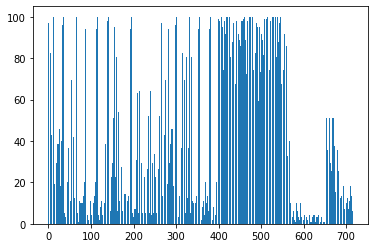

In [6]:
plt.bar(range(len(missed)), list(missed.values()), align='center')

In [7]:
to_drop = []
threshold = 85 # %

for key in missed:
    if missed[key] > threshold:
        to_drop.append(key)

for key in to_drop:
    del missed[key]
df.drop(columns=to_drop, inplace=True)

df_compl = df.drop(columns=missed.keys())
df_compl

,Расстояние до метро,"Суммарное кол-во отзывов в категории ""АЗС"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Алкомаркеты"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Аптеки"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Банки"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Бизнес_центры"" в радиусе 150м","Суммарное кол-во отзывов в категории ""ВУЗы"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Вокзалы"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Детскиемагазины"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Жилыедома"" в радиусе 150м",...,Суммарный вечерний трафик сигналов рабочих в радиусе 140м,Суммарный трафик сигналов рабочих в радиусе 140м,Суммарный утренний трафик юзеров рабочих в радиусе 140м,Суммарный дневной трафик юзеров рабочих в радиусе 140м,Суммарный вечерний трафик юзеров рабочих в радиусе 140м,Суммарный трафик юзеров рабочих в радиусе 140м,Тип БЦ,Тип хаб,Тип улица,Тип ТЦ
0,5526.692151,0,274,56,156,249,0,0,1268,0,...,33,187,3,6,3,6,0,0,1,0
1,16243.183872,0,0,719,402,0,0,0,3445,0,...,303,1302,9,12,11,15,0,0,0,1
2,6401.230357,0,194,425,271,0,0,0,31,0,...,0,0,0,0,0,0,0,0,1,0
3,2255.498620,0,0,0,0,1737,83,0,0,0,...,52,315,6,7,5,10,0,0,1,0
4,5811.209297,0,0,71,0,0,0,0,1051,0,...,257,1189,2,2,2,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,19887.712950,0,0,193,32,0,0,0,785,0,...,185,1074,6,6,7,8,0,0,0,1
94,485.615204,0,1258,237,103,372,60,0,0,0,...,351,1529,9,10,10,13,0,0,1,0
95,2420.989438,0,146,346,16,20,0,0,0,0,...,129,437,8,10,6,14,0,0,1,0
96,11997.377318,0,85,414,547,0,0,0,111,0,...,91,309,10,10,9,12,0,0,1,0


Fill NaNs as predicts of helping model.

In [8]:
import lightgbm as lgb

for col in tqdm(missed.keys()):
    y = df[col]
    
    filt = y.isna().values
    df_train, df_val = df_compl.values[~filt], df_compl.values[filt]
    y_train, y_val = y.values[~filt], y.values[filt]
    
    model = lgb.LGBMRegressor()
    model.fit(df_train, y_train)
    
    y_pred = model.predict(df_val)
    
    correct = np.zeros(len(df))
    correct[~filt] = y_train
    correct[filt] = y_pred
    
    df[col] = correct

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 531/531 [01:10<00:00,  7.49it/s]


In [9]:
del df_compl

In [10]:
missed = dict()
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    
    if pct_missing > 0:
        print('{} - {}%'.format(col, round(pct_missing*100)))
        missed[col] = pct_missing * 100
        
len(missed)

0

In [11]:
df.to_csv('df_filled.csv', index=False)

In [12]:
df = df[:][:88]
y = tgt[:88]

# Dummy linear

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import make_scorer

scorer = make_scorer(mape)
model = LinearRegression()
score = cross_val_score(model, df, y=y,
                        scoring=scorer, cv=10)
score

array([0.3127454, 0.245236 , 0.1617813, 0.2836345, 0.351455 , 0.2864957,
       0.2769914, 0.2518593, 0.2701036, 0.1990466])

In [14]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso, Ridge

def dummy_linear_score(df, y, cv=5):
    scorer = make_scorer(mape)
    model = LinearRegression()
    cv = KFold(cv, shuffle=True)
    return cross_val_score(model, df, y,
                          scoring=scorer, cv=cv)

def dummy_lasso_score(df, y, cv=5):
    scorer = make_scorer(mape)
    model = Lasso()
    cv = KFold(cv, shuffle=True)
    return cross_val_score(model, df, y,
                          scoring=scorer, cv=cv)

def dummy_ridge_score(df, y, cv=5):
    scorer = make_scorer(mape)
    model = Ridge()
    cv = KFold(cv, shuffle=True)
    return cross_val_score(model, df, y,
                          scoring=scorer, cv=cv)

# Low var selection

Drop features with low variance.

In [15]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(0.001)
sel.fit(df)
df = df[df.columns[sel.get_support()]]
df

,Расстояние до метро,"Суммарное кол-во отзывов в категории ""АЗС"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Алкомаркеты"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Аптеки"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Банки"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Бизнес_центры"" в радиусе 150м","Суммарное кол-во отзывов в категории ""ВУЗы"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Вокзалы"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Детскиемагазины"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Кино"" в радиусе 150м",...,Суммарный вечерний трафик сигналов рабочих в радиусе 140м,Суммарный трафик сигналов рабочих в радиусе 140м,Суммарный утренний трафик юзеров рабочих в радиусе 140м,Суммарный дневной трафик юзеров рабочих в радиусе 140м,Суммарный вечерний трафик юзеров рабочих в радиусе 140м,Суммарный трафик юзеров рабочих в радиусе 140м,Тип БЦ,Тип хаб,Тип улица,Тип ТЦ
0,5526.692151,0,274,56,156,249,0,0,1268,0,...,33,187,3,6,3,6,0,0,1,0
1,16243.183872,0,0,719,402,0,0,0,3445,7470,...,303,1302,9,12,11,15,0,0,0,1
2,6401.230357,0,194,425,271,0,0,0,31,0,...,0,0,0,0,0,0,0,0,1,0
3,2255.498620,0,0,0,0,1737,83,0,0,0,...,52,315,6,7,5,10,0,0,1,0
4,5811.209297,0,0,71,0,0,0,0,1051,5384,...,257,1189,2,2,2,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,5123.453252,0,12,316,0,0,0,0,14,0,...,76,1468,6,6,6,8,0,1,0,0
84,3238.098609,0,82,477,92,18,0,0,141,0,...,87,963,6,5,6,11,0,0,1,0
85,13175.266371,0,72,170,596,0,0,0,815,3992,...,200,1426,7,7,6,8,0,0,0,1
86,19176.051056,0,0,16,0,0,0,0,798,0,...,134,1528,7,8,8,11,0,0,0,1


# Separate models

In this part we divide dataframe on items grouped by the type of cafe (Sh. center, Street, B. center, Hub)

## Linear model for cafes in shopping centers

Check group variance uniqueness.

In [16]:
df_sc = df[df['Тип ТЦ'] == 1]
y_sc = y[df['Тип ТЦ'] == 1]
y_nsc = y[~(df['Тип ТЦ'] == 1)]
scipy.stats.bartlett(y_sc, y_nsc)

BartlettResult(statistic=7.587017307601301, pvalue=0.0058790138280118975)

F-test for feature influences

In [17]:
from sklearn.feature_selection import f_regression

p_values = f_regression(df_sc, y_sc)[1]
threshold = 0.02
idx = np.arange(df_sc.values.shape[1])
filt = p_values < threshold

f_cols = df_sc.columns[idx[filt]]
df_sc[f_cols]

,"Суммарное кол-во отзывов в категории ""Алкомаркеты"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Кофейня"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Общепит"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Одеждаиобувь"" в радиусе 150м","Суммарное кол-во отзывов в категории ""Алкомаркеты"" в радиусе 300м","Суммарное кол-во отзывов в категории ""Одеждаиобувь"" в радиусе 300м","Суммарное кол-во отзывов в категории ""ТЦ"" в радиусе 300м","Суммарное кол-во отзывов в категории ""Одеждаиобувь"" в радиусе 500м","Суммарное кол-во отзывов в категории ""ТЦ"" в радиусе 500м","Суммарное кол-во отзывов в категории ""Одеждаиобувь"" в радиусе 700м",...,Максимальный утренний пешеходный трафик сигналов резидентов в радиусе 140м,Максимальный вечерний пешеходный трафик сигналов резидентов в радиусе 140м,Средний утренний пешеходный трафик сигналов резидентов в радиусе 140м,Средний вечерний пешеходный трафик сигналов резидентов в радиусе 140м,Суммарный дневной трафик сигналов в радиусе 140м,Суммарный вечерний трафик сигналов в радиусе 140м,Суммарный трафик сигналов в радиусе 140м,Суммарный дневной трафик юзеров в радиусе 140м,Суммарный вечерний трафик юзеров в радиусе 140м,Суммарный трафик юзеров в радиусе 140м
1,0,839,9623,7555,289,7860,232203,7870,232203,8057,...,28.807578,-1.763212,28.807578,-1.763212,31731,17151,33778,3876,2501,5343
4,0,42,1095,1239,19,2142,24174,2355,24174,2355,...,5.940256,35.482555,5.940256,35.482555,5354,2322,10178,768,468,1213
7,0,33,3388,964,29,1439,32676,1634,32676,1745,...,3.309722,-8.153788,3.309722,-8.153788,9848,4628,22481,1644,1084,3202
8,327,0,325,602,556,4352,29736,4680,29736,4680,...,21.000000,28.000000,21.000000,28.000000,2877,1226,5736,762,364,1193
9,0,0,18,0,0,20,0,382,0,609,...,-9.513352,-2.814843,-9.513352,-2.814843,1849,1453,4812,696,459,1406
10,0,559,5839,88,223,104,9708,156,9708,211,...,3.000000,5.000000,3.000000,5.000000,7763,5343,18325,1198,692,1878
13,33,519,4976,1523,33,1523,37208,1523,41508,1526,...,-16.989719,27.879524,-16.989719,27.879524,10286,5955,19430,1431,961,2182
14,0,435,4300,2709,0,3348,66470,3427,67558,3427,...,20.000000,49.000000,20.000000,49.000000,13248,6728,24624,2112,1302,3200
17,7,146,377,658,37,810,2705,810,2705,810,...,42.351243,12.220278,42.351243,12.220278,4942,2442,8626,900,554,1326
18,0,0,2809,1293,0,2916,57979,3139,57979,3139,...,2.000000,10.000000,2.000000,10.000000,3291,1758,6037,687,370,1024


Prune high-correlated features

In [18]:
corr_matrix = df_sc[f_cols].corr().abs()

corr_pairs = []
for i in range(len(f_cols)):
    for j in range(i):
        if corr_matrix.values[i][j] > 0.995:
            corr_pairs.append([f_cols[i], f_cols[j]])
    
to_drop = set()
for pair in corr_pairs:
    to_drop.add(max(*pair))
    
df_sc = df_sc[f_cols].drop(columns=to_drop)

Stepwise final feature selection

In [19]:
from mlxtend.feature_selection import SequentialFeatureSelector

model = Lasso(max_iter=5000)
cv = KFold(shuffle=True)

sfs = SequentialFeatureSelector(model, k_features=10, forward=True,
                                floating=True, 
                                scoring='neg_mean_absolute_percentage_error', cv=cv,
                                verbose=True, n_jobs=-1)
sfs.fit(df_sc, y_sc)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 349 out of 349 | elapsed:    2.9s finished
Features: 1/10[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 348 out of 348 | elapsed:    1.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
Features: 2/10[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 347 out of 347 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   

SequentialFeatureSelector(cv=KFold(n_splits=5, random_state=None, shuffle=True),
                          estimator=Lasso(max_iter=5000), floating=True,
                          k_features=10, n_jobs=-1,
                          scoring='neg_mean_absolute_percentage_error',
                          verbose=True)

In [20]:
# sfs_cols = list(sfs.k_feature_names_)


sfs_cols = ['Среднее кол-во отзывов в категории "Кофейня" в радиусе 150м',
 'Суммарное количество объектов в категории "Салонысвязи" в радиусе 500м',
 'Суммарный средний рейтинг объектов в категории "Косметика" в радиусе 150м',
 'Суммарный средний рейтинг объектов в категории "Одеждаиобувь" в радиусе 1000м',
 'Суммарный средний рейтинг объектов в радиусе 1000м',
 'Средний  мобильный трафик в радиусе 1000м heaviside',
 'Максимальный утренний пешеходный трафик сигналов в радиусе 1000м',
 'Суммарный  пешеходный трафик юзеров в радиусе 1000м',
 'Максимальный дневной автомобильный трафик сигналов резидентов в радиусе 1000м',
 'Максимальный вечерний пешеходный трафик сигналов резидентов в радиусе 140м']

In [21]:
scores = []
for i in range(60):
    scores.append(dummy_lasso_score(df_sc[sfs_cols], y_sc).mean())

sum(scores) / len(scores)

0.06884673052269691

In [22]:
sfs_cols

['Среднее кол-во отзывов в категории "Кофейня" в радиусе 150м',
 'Суммарное количество объектов в категории "Салонысвязи" в радиусе 500м',
 'Суммарный средний рейтинг объектов в категории "Косметика" в радиусе 150м',
 'Суммарный средний рейтинг объектов в категории "Одеждаиобувь" в радиусе 1000м',
 'Суммарный средний рейтинг объектов в радиусе 1000м',
 'Средний  мобильный трафик в радиусе 1000м heaviside',
 'Максимальный утренний пешеходный трафик сигналов в радиусе 1000м',
 'Суммарный  пешеходный трафик юзеров в радиусе 1000м',
 'Максимальный дневной автомобильный трафик сигналов резидентов в радиусе 1000м',
 'Максимальный вечерний пешеходный трафик сигналов резидентов в радиусе 140м']

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

kf = KFold(5, shuffle=True)

params = {'alpha': [0.1, 0.2, 0.5, 1.0, 1.2],
          'selection': ['cyclic', 'random'],
          'tol': [0.001, 0.0001, 0.00001],
          'positive': [True, False]
         }

model = Lasso(max_iter=5000)
gs = GridSearchCV(model, param_grid=params,
                  scoring='neg_mean_absolute_percentage_error',
                  n_jobs=-1, cv=kf, verbose=True)
gs.fit(df_sc[sfs_cols].values, y_sc)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Lasso(max_iter=5000), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.2, 0.5, 1.0, 1.2],
                         'positive': [True, False],
                         'selection': ['cyclic', 'random'],
                         'tol': [0.001, 0.0001, 1e-05]},
             scoring='neg_mean_absolute_percentage_error', verbose=True)

In [56]:
-gs.best_score_

0.06381073115944653

In [57]:
gs.best_params_

{'alpha': 0.1, 'positive': False, 'selection': 'cyclic', 'tol': 0.0001}

In [58]:
model = Lasso(**gs.best_params_)

scores = []
for i in range(60):
    scores.append(cross_val_score(model, df_sc[sfs_cols], y_sc,
                  scoring=scorer, cv=kf).mean())

print(f'Mean score for sh. center cafes: {sum(scores) / len(scores)}')

Mean score for sh. center cafes: 0.07229101869098299


In [59]:
model_sc = Lasso(**gs.best_params_)

model_sc.fit(df_sc[sfs_cols], y_sc)

Lasso(selection='random', tol=0.001)

## Linear model for cafes on the streets

Analogue feature selection. Attention to bad p-value for Bartlett (which don't let us to deny equalness of vars).

In [60]:
df_street = df[df['Тип улица'] == 1]
y_street = y[df['Тип улица'] == 1]
y_nstreet = y[~(df['Тип улица'] == 1)]
scipy.stats.bartlett(y_street, y_nstreet)

BartlettResult(statistic=3.8347995955760337, pvalue=0.05019899178377584)

In [61]:
from sklearn.feature_selection import f_regression

p_values = f_regression(df_street, y_street)[1]
threshold = 0.02
idx = np.arange(df_street.values.shape[1])
filt = p_values < threshold

f_cols = df_street.columns[idx[filt]]
df_street[f_cols].shape

(43, 20)

In [62]:
corr_matrix = df_street[f_cols].corr().abs()

corr_pairs = []
for i in range(len(f_cols)):
    for j in range(i):
        if corr_matrix.values[i][j] > 0.995:
            corr_pairs.append([f_cols[i], f_cols[j]])
    
to_drop = set()
for pair in corr_pairs:
    to_drop.add(max(*pair))

In [63]:
len(to_drop)
df_street = df_street[f_cols].drop(columns=to_drop)

In [105]:
from mlxtend.feature_selection import SequentialFeatureSelector

model = Lasso(max_iter=5000)
cv = KFold(shuffle=True)
sfs = SequentialFeatureSelector(model, k_features=10, forward=True,
                                floating=True, scoring='neg_mean_absolute_percentage_error', cv=cv,
                                verbose=True, n_jobs=-1)
sfs.fit(df_street, y_street)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.1s finished
Features: 1/10[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
Features: 2/10[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s finished
Features: 3/10[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concu

SequentialFeatureSelector(cv=KFold(n_splits=5, random_state=None, shuffle=True),
                          estimator=Lasso(max_iter=5000), floating=True,
                          k_features=10, n_jobs=-1,
                          scoring='neg_mean_absolute_percentage_error',
                          verbose=True)

In [106]:
sfs_cols = list(sfs.k_feature_names_)

In [107]:
scores = []
for i in range(60):
    scores.append(dummy_lasso_score(df_street[sfs_cols], y_street).mean())

sum(scores) / len(scores)

0.07909706769028178

In [108]:
sfs_cols

['Суммарное кол-во отзывов в категории "Кофейня" в радиусе 500м',
 'Суммарное кол-во отзывов в категории "АЗС" в радиусе 1000м',
 'Среднее кол-во отзывов в категории "Стадионы" в радиусе 500м',
 'Суммарное количество объектов в категории "Банки" в радиусе 300м',
 'Суммарное количество объектов в категории "Стадионы" в радиусе 500м',
 'Суммарное количество объектов в категории "Банки" в радиусе 1000м',
 'Суммарный средний рейтинг объектов в категории "Стадионы" в радиусе 500м',
 'Средний средний рейтинг объектов в категории "Сетеваякосметикаидрогери" в радиусе 150м',
 'Средний средний рейтинг объектов в категории "ТЦ" в радиусе 300м',
 'Средний средний рейтинг объектов в категории "Пунктывыдачи" в радиусе 500м']

In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

kf = KFold(5, shuffle=True)

params = {'alpha': [0.05, 0.1, 0.2, 0.5, 1.0, 1.2],
          'selection': ['cyclic', 'random'],
          'tol': [0.001, 0.0001, 0.00001],
          'positive': [True, False]
         }

model = Lasso()
gs = GridSearchCV(model, param_grid=params,
                  scoring='neg_mean_absolute_percentage_error',
                  n_jobs=-1, cv=kf, verbose=True)
gs.fit(df_street[sfs_cols].values, y_street)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.05, 0.1, 0.2, 0.5, 1.0, 1.2],
                         'positive': [True, False],
                         'selection': ['cyclic', 'random'],
                         'tol': [0.001, 0.0001, 1e-05]},
             scoring='neg_mean_absolute_percentage_error', verbose=True)

In [113]:
-gs.best_score_

0.07563364498778088

In [114]:
gs.best_params_

{'alpha': 0.1, 'positive': False, 'selection': 'random', 'tol': 0.001}

In [115]:
model = Lasso(**gs.best_params_)

scores = []
for i in range(60):
    scores.append(cross_val_score(model, df_street[sfs_cols], y_street,
                  scoring=scorer, cv=kf).mean())

sum(scores) / len(scores)

0.07839394099137338

The best score for street cafes is about 0.077. We will see that it is better to include them in model without concrete type.

## GB model for random cafes

Select features for gb.

In [116]:
import lightgbm as lgb

model = lgb.LGBMRegressor()
model.fit(df.values, y)
importances = model.feature_importances_

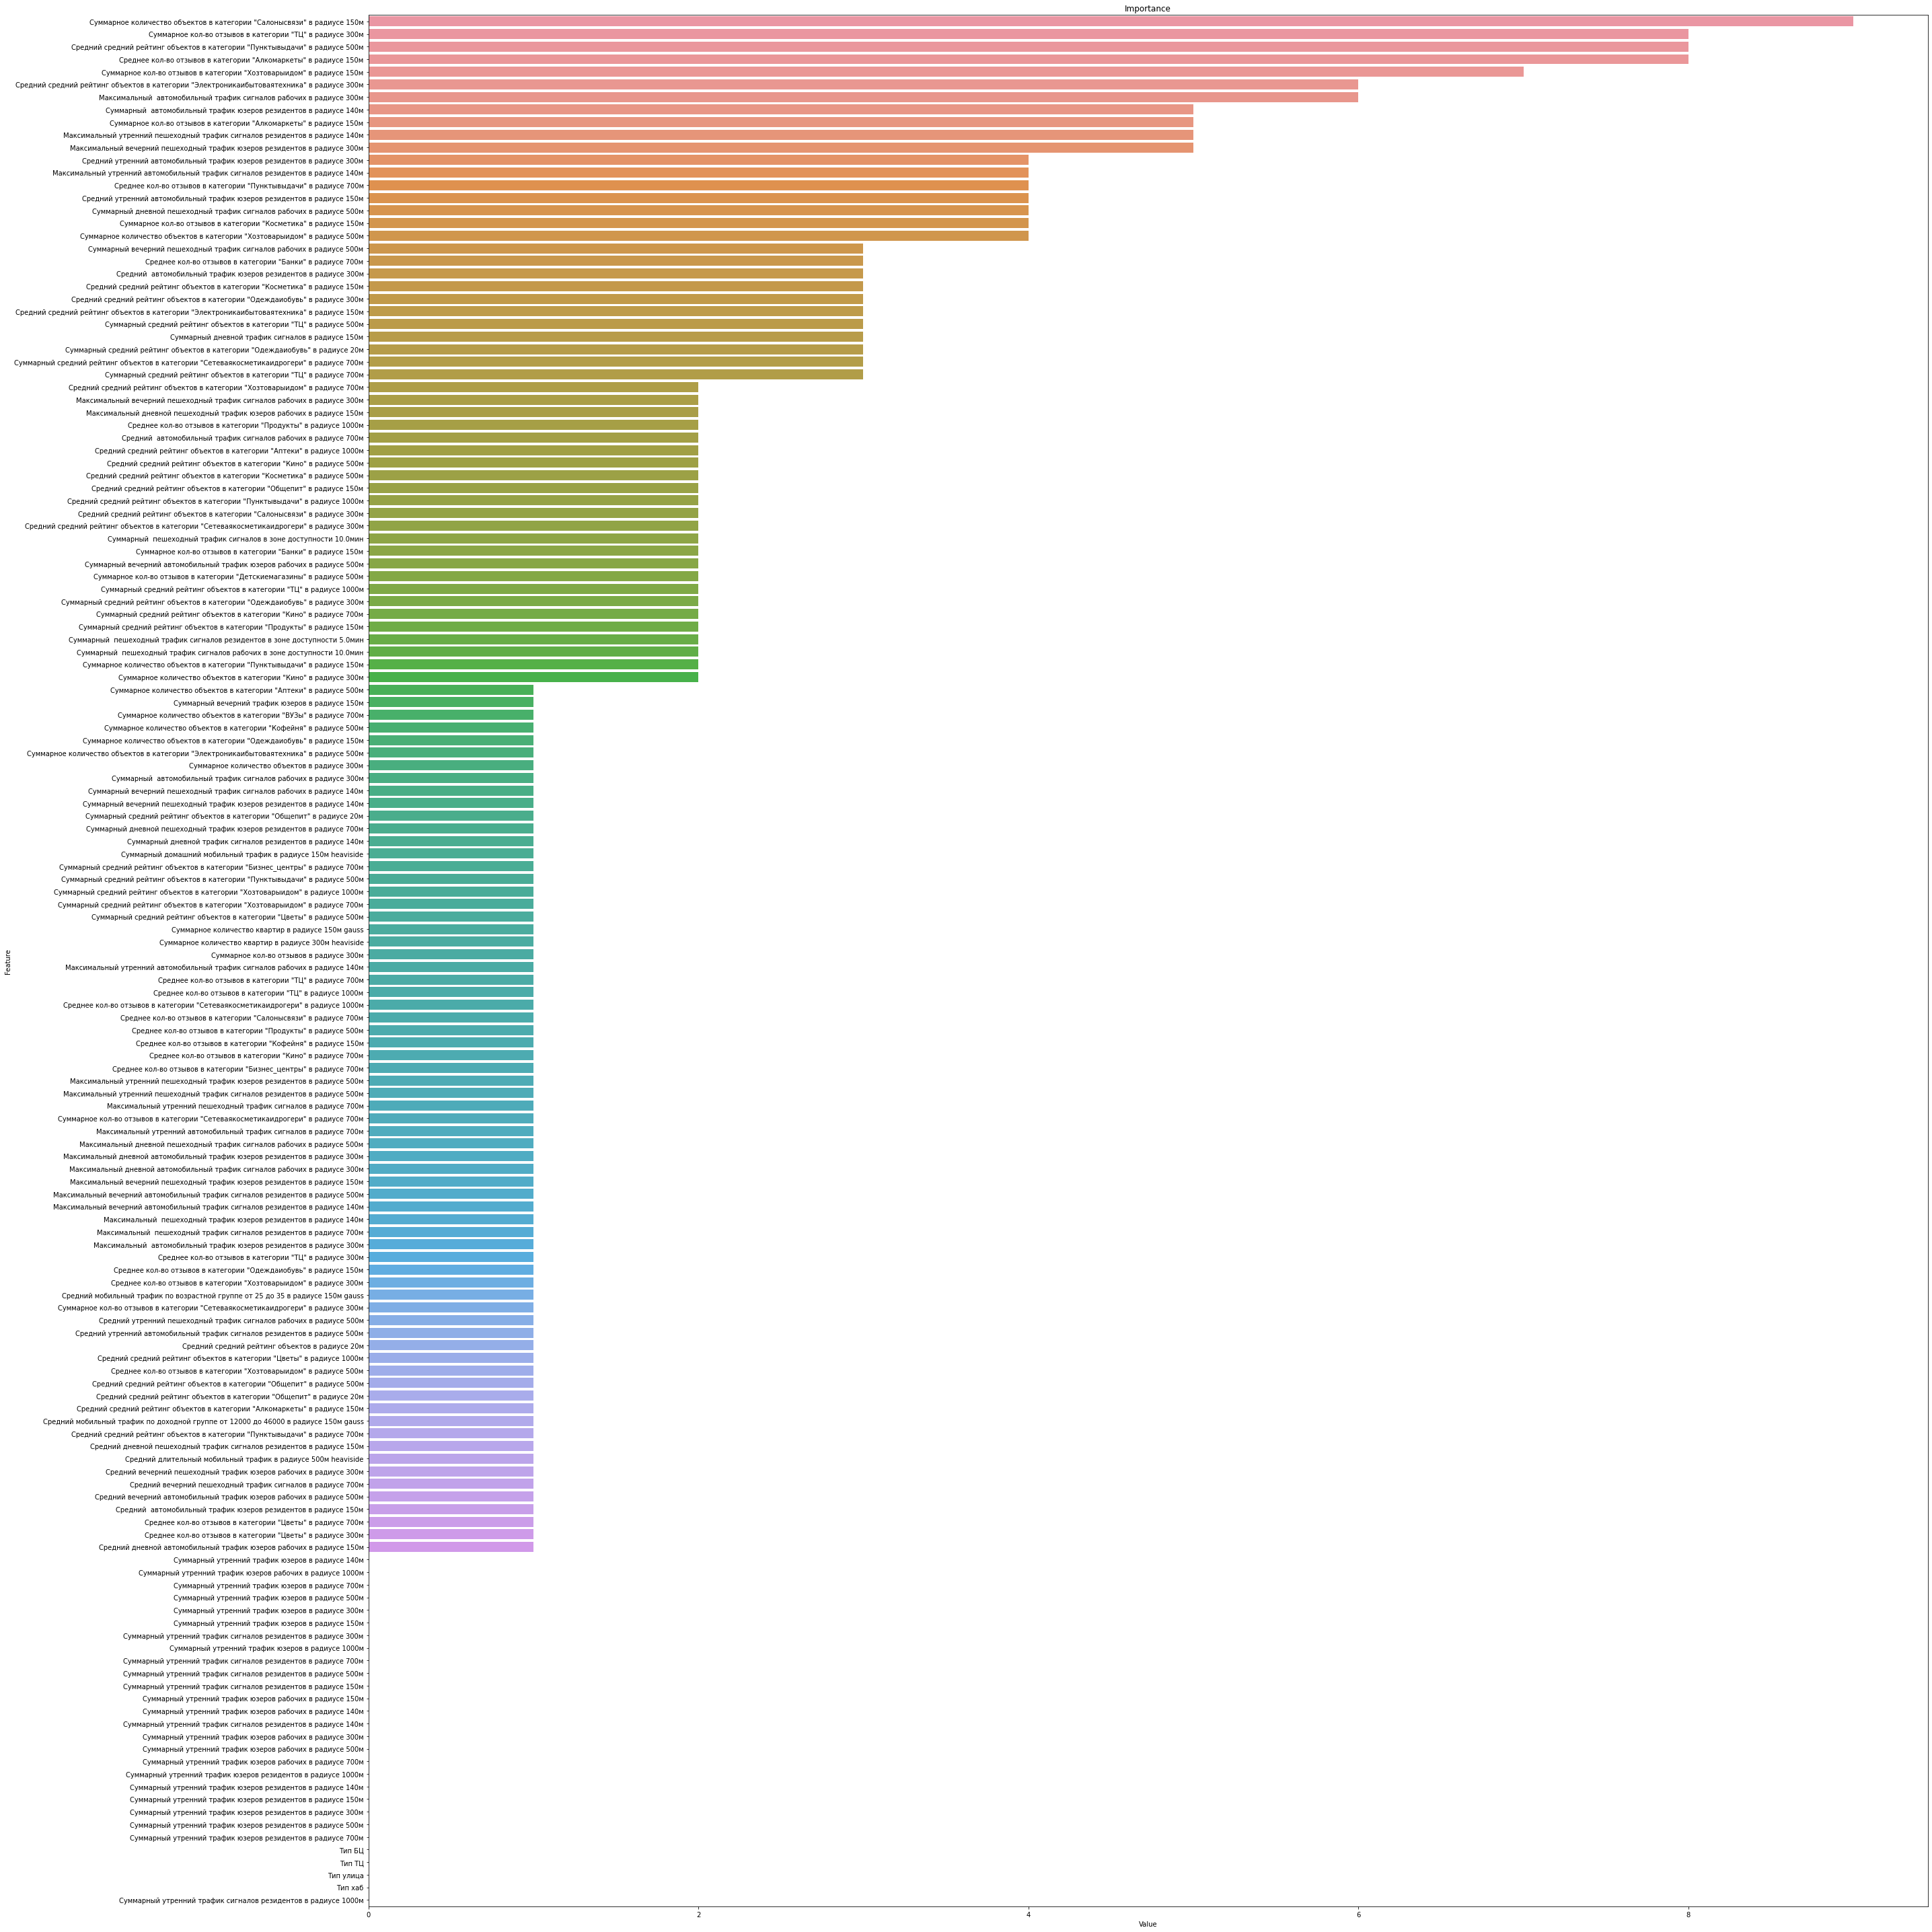

In [117]:
feature_imp = pd.DataFrame(sorted(zip(importances, df.columns))[-150:], columns=['Value','Feature'])

plt.figure(figsize=(40, 40))
sns.barplot(x="Value", y="Feature",
            data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Importance')
plt.tight_layout()
plt.show()

In [118]:
gb_cols = list(feature_imp.loc[130:, 'Feature'].values)
model = lgb.LGBMRegressor()
cv = KFold(5, shuffle=True)
cross_val_score(model, df[gb_cols].values, y,
               scoring=scorer, cv=cv).mean()

0.07595411155639938

In [119]:
scores = []
for i in range(60):
    scores.append(cross_val_score(model, df[gb_cols].values, y,
                  scoring=scorer, cv=cv).mean())

print(f'Mean score for GB model (all types of cafe): {sum(scores) / len(scores)}')

Mean score for GB model (all types of cafe): 0.07250608704051012


Tune hyperparams. for gb.

In [120]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import lightgbm as lgb

kf = KFold(5)

params = {'learning_rate': [0.05, 0.1, 0.2],
          'n_estimators': [70, 100, 150, 200],
          'subsample': [0.75, 1.0],
          'colsample_bytree': [0.75, 1.0],
          'num_leaves': [30, 40, 50, 60, 70],
          'reg_alpha': [0, 0.0001],
          'reg_lambda': [0, 0.0001],
         }

model = lgb.LGBMRegressor()
gs = GridSearchCV(model, param_grid=params,
                  scoring='neg_mean_absolute_percentage_error',
                  n_jobs=-1, cv=kf, verbose=True)
gs.fit(df[gb_cols].values, y)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.75, 1.0],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'n_estimators': [70, 100, 150, 200],
                         'num_leaves': [30, 40, 50, 60, 70],
                         'reg_alpha': [0, 0.0001], 'reg_lambda': [0, 0.0001],
                         'subsample': [0.75, 1.0]},
             scoring='neg_mean_absolute_percentage_error', verbose=True)

In [121]:
-gs.best_score_

0.07337902820582651

We will work here with all types except for 'Shopping center'

In [122]:
stratif = ((df['Тип хаб'] == 1).values + (df['Тип БЦ'] == 1).values + (df['Тип улица'] == 1).values)# .astype(int)

In [123]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(5, shuffle=True)
strat_idx = np.arange(len(df))[stratif]

score_list = []
for _ in range(60):
    scores = []
    for train_idx, test_idx in cv.split(df[f_cols], stratif):
        model = lgb.LGBMRegressor(**gs.best_params_)
        
        df_train = df[gb_cols].loc[train_idx]
        df_val = df[gb_cols].loc[set.intersection(set(test_idx),
                                 set(strat_idx))]

        y_train = y[train_idx]
        y_val = y[set.intersection(set(test_idx),
                       set(strat_idx))]
        model.fit(df_train.values, y_train)
        y_pred = model.predict(df_val)

        scores.append(mape(y_val, y_pred))

    score_list.append(sum(scores) / len(scores))
    
sum(score_list) / len(score_list)

0.0674483948634737

In [124]:
model_gb = lgb.LGBMRegressor(**gs.best_params_)

model_gb.fit(df[gb_cols].values, y)

LGBMRegressor(colsample_bytree=0.75, num_leaves=30, reg_alpha=0,
              reg_lambda=0.0001, subsample=0.75)

# Distribution analysis (on sh. center linear model)

<AxesSubplot:xlabel='target', ylabel='Density'>

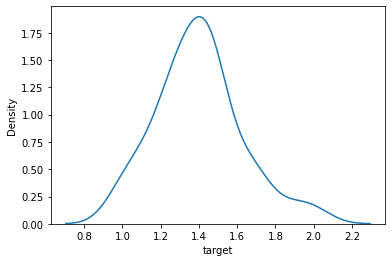

In [125]:
import seaborn as sns

sns.kdeplot(y_sc, bw_adjust=0.9)

# Residual analysis (on sh. center linear model)

<AxesSubplot:xlabel='target', ylabel='Density'>

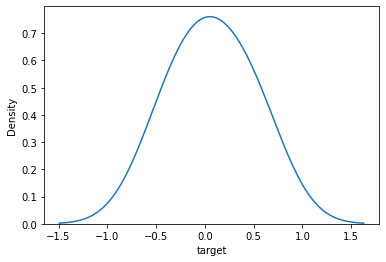

In [148]:
from sklearn.model_selection import train_test_split as split

df_train, df_val, y_train, y_val = split(df_sc, y_sc,
                                         shuffle=True,
                                         test_size=0.28)

model = LinearRegression()
model.fit(df_train, y_train)

y_pred = model.predict(df_val)

res = (y_val - y_pred)

sns.kdeplot(res,
           bw_adjust=1.5)

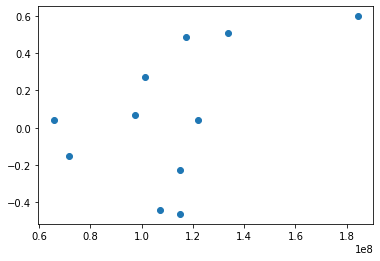

In [149]:
norms = (df_val.values ** 2).sum(axis=-1) ** (1 / 2)
plt.scatter(norms, res)

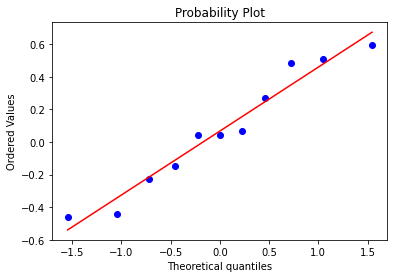

In [150]:
import numpy as np 
import pylab
import scipy.stats as stats

stats.probplot(res, dist="norm", plot=pylab)
pylab.show()

# Saving final result

There are two final models - Lasso linear for sh. center cafes. Gradient boosting for all others. The choice was made judging by best scores.

In [138]:
df = pd.read_csv('df_filled.csv')
df = df[88:]

Final features for sh.center cafes.

In [139]:
df_sc_test = df[df['Тип ТЦ'] == 1]
df_sc_test = df_sc_test[sfs_cols]
df_sc_test

,"Среднее кол-во отзывов в категории ""Кофейня"" в радиусе 150м","Суммарное количество объектов в категории ""Салонысвязи"" в радиусе 500м","Суммарный средний рейтинг объектов в категории ""Косметика"" в радиусе 150м","Суммарный средний рейтинг объектов в категории ""Одеждаиобувь"" в радиусе 1000м",Суммарный средний рейтинг объектов в радиусе 1000м,Средний мобильный трафик в радиусе 1000м heaviside,Максимальный утренний пешеходный трафик сигналов в радиусе 1000м,Суммарный пешеходный трафик юзеров в радиусе 1000м,Максимальный дневной автомобильный трафик сигналов резидентов в радиусе 1000м,Максимальный вечерний пешеходный трафик сигналов резидентов в радиусе 140м
88,53.750000,8,81.5,803.4,1348.0,14766.519270,7252,67709,921,3.0000
89,37.500000,12,0.0,108.4,587.1,21945.022546,2612,25685,833,2.0000
91,131.600000,14,119.9,763.3,1581.5,17969.328975,2773,44789,345,17.0000
93,31.333333,10,37.3,235.2,563.0,4603.608333,3124,26101,79,16.9625


In [140]:
y_sc_test = model_sc.predict(df_sc_test)
y_sc_test

array([2.0248848, 1.2562763, 1.4619065, 1.3395317])

In [141]:
d1 = dict(zip(list(df_sc_test.index), (y_sc_test)))
d1

{88: 2.024884801169363,
 89: 1.256276266317527,
 91: 1.4619064655782832,
 93: 1.3395317356822583}

Final features for gb model.

In [142]:
df_gb_test = df[(df['Тип хаб'] == 1).values + (df['Тип БЦ'] == 1).values + (df['Тип улица'] == 1).values]
df_gb_test = df_gb_test[gb_cols]
df_gb_test

,"Суммарный средний рейтинг объектов в категории ""ТЦ"" в радиусе 500м","Суммарный средний рейтинг объектов в категории ""ТЦ"" в радиусе 700м",Максимальный утренний автомобильный трафик сигналов резидентов в радиусе 140м,"Среднее кол-во отзывов в категории ""Пунктывыдачи"" в радиусе 700м",Средний утренний автомобильный трафик юзеров резидентов в радиусе 150м,Средний утренний автомобильный трафик юзеров резидентов в радиусе 300м,"Суммарное кол-во отзывов в категории ""Косметика"" в радиусе 150м","Суммарное количество объектов в категории ""Хозтоварыидом"" в радиусе 500м",Суммарный дневной пешеходный трафик сигналов рабочих в радиусе 500м,Максимальный вечерний пешеходный трафик юзеров резидентов в радиусе 300м,Максимальный утренний пешеходный трафик сигналов резидентов в радиусе 140м,"Суммарное кол-во отзывов в категории ""Алкомаркеты"" в радиусе 150м",Суммарный автомобильный трафик юзеров резидентов в радиусе 140м,Максимальный автомобильный трафик сигналов рабочих в радиусе 300м,"Средний средний рейтинг объектов в категории ""Электроникаибытоваятехника"" в радиусе 300м","Суммарное кол-во отзывов в категории ""Хозтоварыидом"" в радиусе 150м","Среднее кол-во отзывов в категории ""Алкомаркеты"" в радиусе 150м","Средний средний рейтинг объектов в категории ""Пунктывыдачи"" в радиусе 500м","Суммарное кол-во отзывов в категории ""ТЦ"" в радиусе 300м","Суммарное количество объектов в категории ""Салонысвязи"" в радиусе 150м"
90,8.6,8.6,4.000000,37.333333,1.500000,1.928571,494,8,6686,6,71.0,8,3,545,4.300000,357,8.000000,3.885714,78710,10
92,7.4,7.4,-45.881956,17.000000,3.250000,2.466667,0,3,6410,8,2.0,0,0,1046,4.266186,757,30.556755,3.800000,788,2
94,0.0,0.0,1.000000,70.076923,2.000000,1.600000,373,5,7465,8,14.0,1258,1,1654,4.100000,0,314.500000,4.381818,0,2
95,0.0,0.0,5.000000,37.200000,1.142857,1.687500,263,3,11754,6,67.0,146,5,6877,4.566667,45,146.000000,4.360000,0,3
96,11.7,15.8,49.000000,22.000000,3.300000,3.103448,224,7,8437,13,49.0,85,6,4851,3.771429,7,21.250000,3.760000,6128,8
97,12.4,12.4,5.000000,91.200000,1.600000,2.000000,0,5,11549,10,72.0,0,1,1392,4.551925,0,66.822202,4.600000,967,1


In [143]:
y_gb_test = model_gb.predict(df_gb_test)
y_gb_test

array([1.6055957, 1.57246  , 1.2175431, 1.4401293, 1.3060833, 1.2435378])

In [144]:
d2 = dict(zip(list(df_gb_test.index), (y_gb_test)))
d2

{90: 1.605595656442869,
 92: 1.5724600178340973,
 94: 1.2175430991173293,
 95: 1.4401293411304321,
 96: 1.306083279485851,
 97: 1.243537764448389}

In [145]:
d1.update(d2)
d1[88] = 2.0
d1

{88: 2.0,
 89: 1.256276266317527,
 91: 1.4619064655782832,
 93: 1.3395317356822583,
 90: 1.605595656442869,
 92: 1.5724600178340973,
 94: 1.2175430991173293,
 95: 1.4401293411304321,
 96: 1.306083279485851,
 97: 1.243537764448389}

In [146]:
df_res = pd.read_excel('форма для заполнения.xlsx')
df_res['target predicted'] = d1.values()
df_res

,id,target predicted
0,3,2.000000
1,25,1.256276
2,55,1.461906
3,69,1.339532
4,109,1.605596
5,112,1.572460
6,117,1.217543
7,126,1.440129
8,144,1.306083
9,145,1.243538


In [147]:
df_res.to_excel('форма для заполнения.xlsx', index=False)